<a href="https://colab.research.google.com/github/Gibsdevops/ML_tensorflowLite/blob/main/tensorflow_lite_coversion_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:

#!pip install -q -U 'tensorflow-gpu==2.12'

In [2]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

Create a basic model of the form y = mx + c

In [3]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

# Convert x and y to NumPy arrays
x_np = np.array(x)
y_np = np.array(y)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_np, y_np, epochs=200, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 21.6894
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17.3388
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.9103
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.2074
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.0755
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.3929
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.0639
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.0133
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4.1817
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.5225
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9992
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.5828
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.2506
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9847
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.7712
Epoch 16/200
1

Convert the keras model to TFLite

In [11]:
# ... (your model training code) ...

# Instead of export_dir = 'saved_model/1' and tf.saved_model.save(model, export_dir)
# And then converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter = tf.lite.TFLiteConverter.from_keras_model(model) # Use the 'model' object directly
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

Saved artifact at '/tmp/tmpymygtimi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135111190068304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135112024041488: TensorSpec(shape=(), dtype=tf.resource, name=None)


1104

Initialize the TFLite interpreter to try it out

In [12]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [13]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

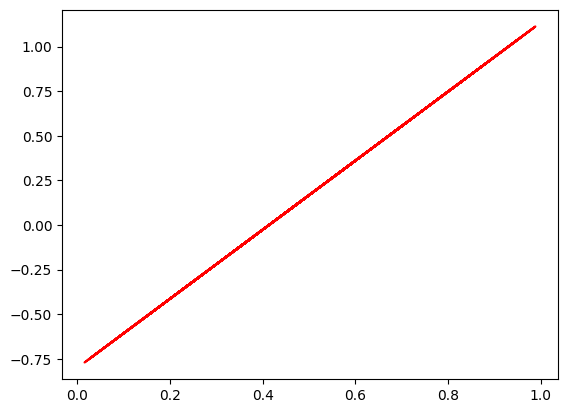

In [14]:
plt.plot(inputs, outputs, 'r')
plt.show()

In [15]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>